=== Missing Values ===
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

=== Duplicate Records ===
Jumlah duplikasi: 0

Kolom 'Id' dihapus karena tidak relevan untuk prediksi.

=== Distribusi Kelas Target ===
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


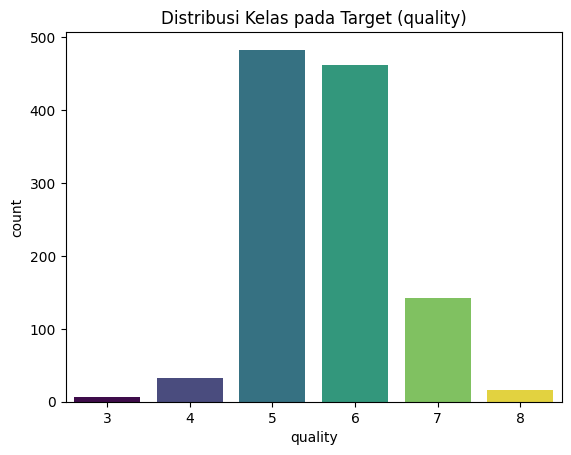

In [31]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df = pd.read_csv("WineQT.csv")  # ganti sesuai nama file dataset

# 1. Cek Missing Values
print("=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values)

# 2. Cek Duplicate Records
print("\n=== Duplicate Records ===")
duplicate_count = df.duplicated().sum()
print(f"Jumlah duplikasi: {duplicate_count}")

if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Dataset setelah hapus duplikasi: {df.shape}")

# 3. Cek Fitur Tidak Relevan
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])
    print("\nKolom 'Id' dihapus karena tidak relevan untuk prediksi.")

# 4. Distribusi Kelas Target
print("\n=== Distribusi Kelas Target ===")
target_counts = df['quality'].value_counts().sort_index()
print(target_counts)

sns.countplot(x='quality', hue='quality', data=df, palette='viridis', legend=False)
plt.title("Distribusi Kelas pada Target (quality)")
plt.show()


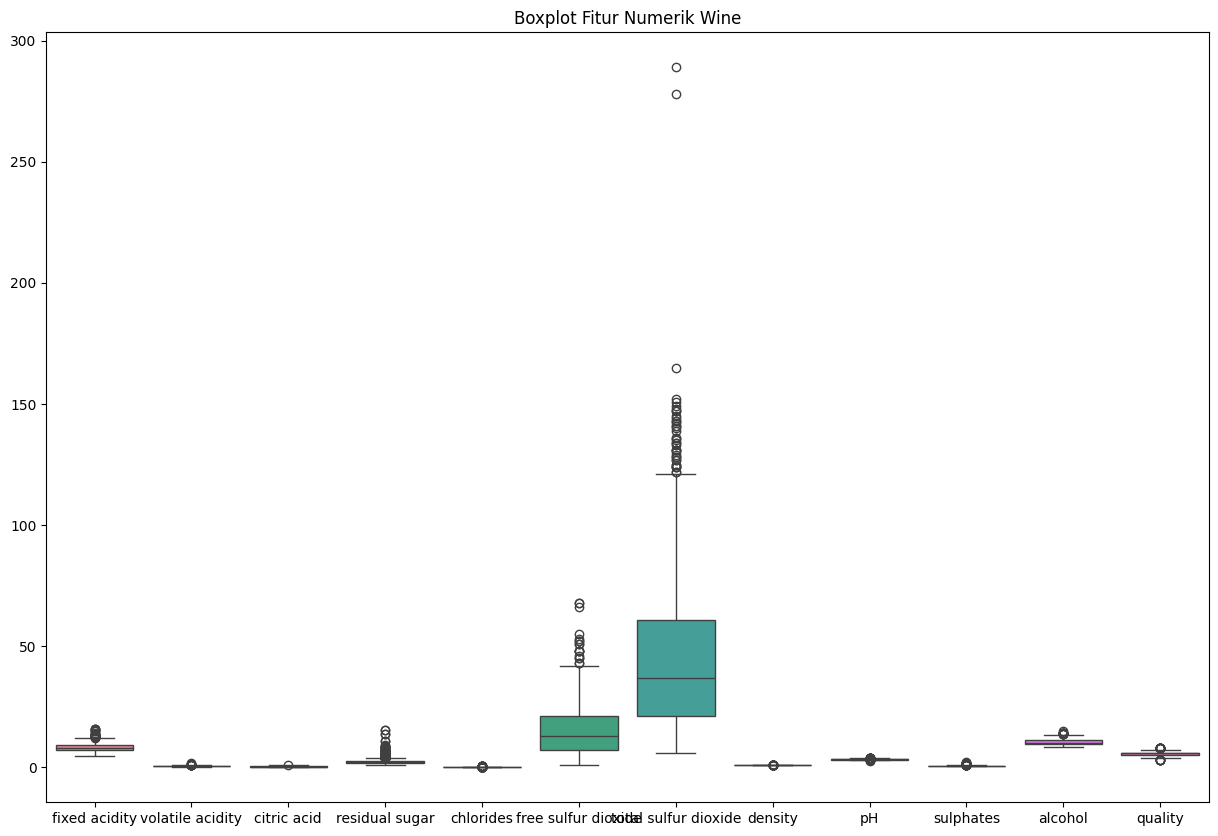

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.title('Boxplot Fitur Numerik Wine')
plt.show()


In [20]:
df['quality_label'] = df['quality'].apply(lambda x: 0 if x <=5 else 1)  # 0=low, 1=high


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['quality','quality_label']))


In [22]:
import pandas as pd

correlation_matrix = df.corr()
print(correlation_matrix['quality'].sort_values(ascending=False))


quality                 1.000000
quality_label           0.846007
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['quality','quality_label'])
y = df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


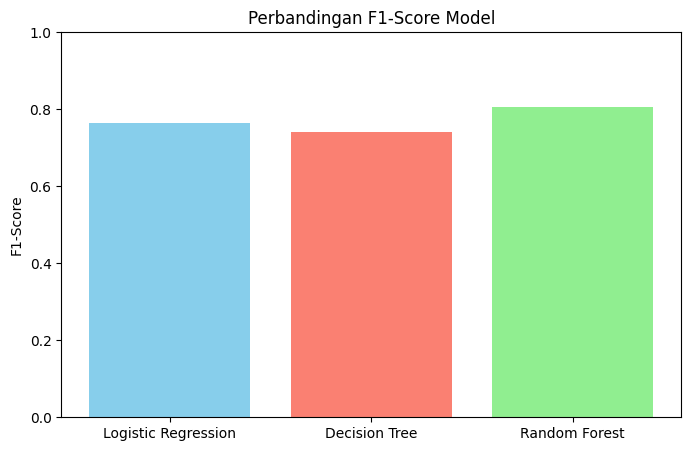

In [24]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
f1_scores = [0.7639, 0.7413, 0.8063]

plt.figure(figsize=(8,5))
plt.bar(models, f1_scores, color=['skyblue','salmon','lightgreen'])
plt.ylim(0,1)
plt.title('Perbandingan F1-Score Model')
plt.ylabel('F1-Score')
plt.show()


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

lr_model = LogisticRegression(
    C=1,
    penalty='l1',
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print("Logistic Regression Performance:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.7467248908296943
F1 Score: 0.7542372881355932
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       105
           1       0.79      0.72      0.75       124

    accuracy                           0.75       229
   macro avg       0.75      0.75      0.75       229
weighted avg       0.75      0.75      0.75       229



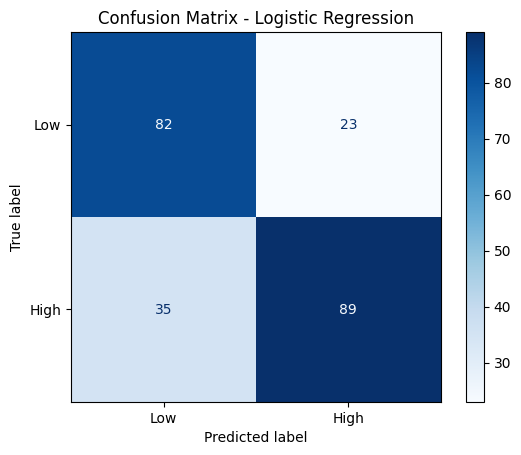

In [26]:
ConfusionMatrixDisplay.from_estimator(
    lr_model,
    X_test,
    y_test,
    display_labels=['Low','High'],
    cmap='Blues'
)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [27]:
coef_df = pd.DataFrame({
    'Fitur': X_train.columns,
    'Koefisien': lr_model.coef_[0]
}).sort_values(by='Koefisien', ascending=False)
print("\nKoefisien Fitur (Logistic Regression):")
print(coef_df)



Koefisien Fitur (Logistic Regression):
                   Fitur  Koefisien
9              sulphates   1.989483
10               alcohol   0.876119
5    free sulfur dioxide   0.026402
0          fixed acidity   0.015975
3         residual sugar  -0.018360
6   total sulfur dioxide  -0.019383
4              chlorides  -0.212383
8                     pH  -0.843828
2            citric acid  -0.845365
7                density  -2.506062
1       volatile acidity  -3.063555


Decision Tree Performance:
Accuracy: 0.7074235807860262
F1 Score: 0.7413127413127413
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       105
           1       0.71      0.77      0.74       124

    accuracy                           0.71       229
   macro avg       0.71      0.70      0.70       229
weighted avg       0.71      0.71      0.71       229



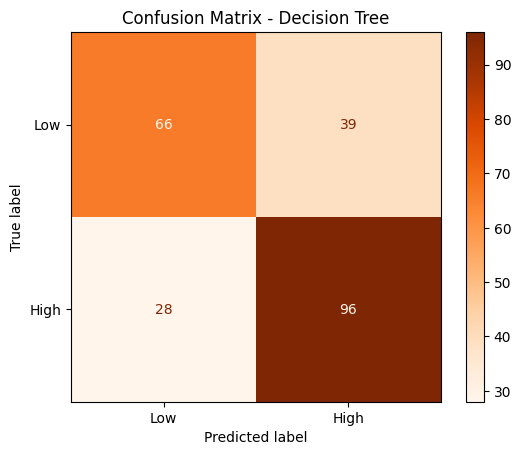


Feature Importance (Decision Tree):
                   Fitur  Importance
10               alcohol    0.259279
9              sulphates    0.129442
1       volatile acidity    0.108345
6   total sulfur dioxide    0.101063
8                     pH    0.092676
4              chlorides    0.069442
3         residual sugar    0.061621
2            citric acid    0.047952
7                density    0.045884
0          fixed acidity    0.044558
5    free sulfur dioxide    0.039738


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
print("Decision Tree Performance:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred_dt))

ConfusionMatrixDisplay.from_estimator(
    dt_model,
    X_test,
    y_test,
    display_labels=['Low','High'],
    cmap='Oranges'
)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

feat_importance = pd.DataFrame({
    'Fitur': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Decision Tree):")
print(feat_importance)


Random Forest Performance:
Accuracy: 0.7860262008733624
F1 Score: 0.8063241106719368
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       105
           1       0.79      0.82      0.81       124

    accuracy                           0.79       229
   macro avg       0.79      0.78      0.78       229
weighted avg       0.79      0.79      0.79       229



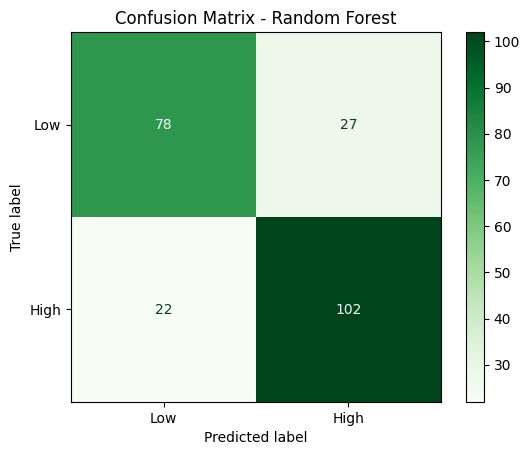


Feature Importance (Random Forest):
                   Fitur  Importance
10               alcohol    0.197874
9              sulphates    0.135043
6   total sulfur dioxide    0.106283
1       volatile acidity    0.099415
7                density    0.084643
4              chlorides    0.072734
8                     pH    0.070205
0          fixed acidity    0.063539
2            citric acid    0.060635
3         residual sugar    0.056657
5    free sulfur dioxide    0.052972


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

rf_model = RandomForestClassifier(
    n_estimators=100,      # jumlah tree
    random_state=42,       # agar hasil reproducible
    class_weight='balanced' # mengatasi ketidakseimbangan kelas
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print("Random Forest Performance:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=['Low','High'],
    cmap='Greens'
)
plt.title('Confusion Matrix - Random Forest')
plt.show()

feat_importance = pd.DataFrame({
    'Fitur': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Random Forest):")
print(feat_importance)


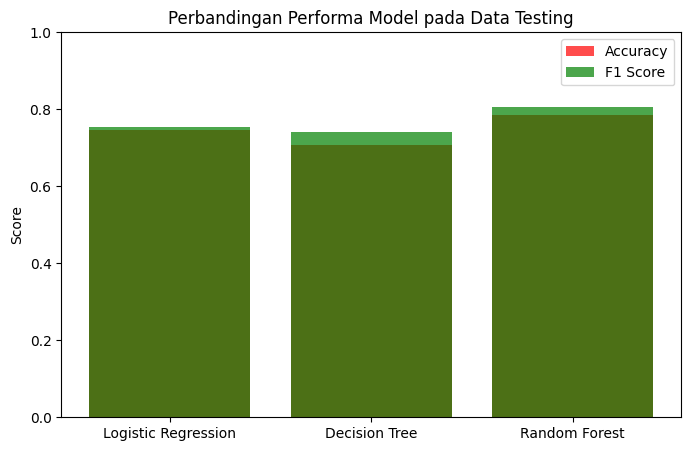

In [30]:
import matplotlib.pyplot as plt

results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.7467, 0.7074, 0.7860],
    'F1 Score': [0.7542, 0.7413, 0.8063]
}

plt.figure(figsize=(8,5))
plt.bar(results['Model'], results['Accuracy'], color='red', alpha=0.7, label='Accuracy')
plt.bar(results['Model'], results['F1 Score'], color='green', alpha=0.7, label='F1 Score')
plt.ylabel('Score')
plt.title('Perbandingan Performa Model pada Data Testing')
plt.ylim(0,1)
plt.legend()
plt.show()
